In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu_r']

### Load ATLAS Data

In [14]:
atlasDF = pd.read_pickle('../../ATLAS_data/gluinoTables.pcl')

### Recast Data

In [15]:
recastDF = pd.read_pickle('gluinoCutFlow.pcl')
# Round lifetime
recastDF = recastDF.round({'tau_ns' : 2})

### Compare Acceptances

/tmp/ipykernel_10622/924667016.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  ratio.append(row['(Acceptance)'][0]/atlasDF_sel.iloc[0]['Acceptance'])


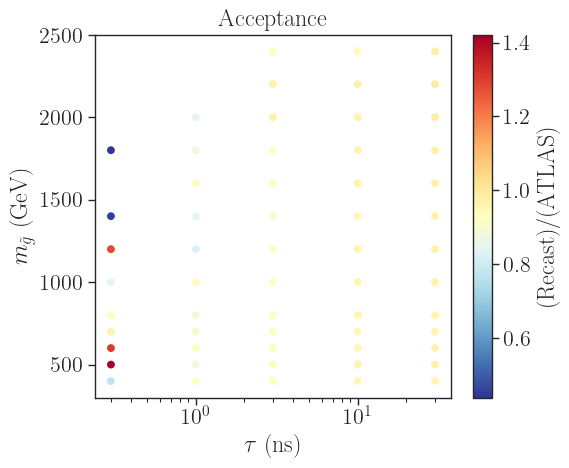

In [16]:
fig = plt.figure(figsize=(6,5))
atlasAcc = []
ratio = []
x = []
y = []
for irow,row in recastDF.iterrows():
    atlasDF_sel = atlasDF[(atlasDF['mLLP'] == row['mLLP']) 
                          & (atlasDF['mLSP'] == row['mLSP'])
                          & (atlasDF['tau_ns'] == row['tau_ns'])
                          ]
    if len(atlasDF_sel) != 1:
        continue
    y.append(row['mLLP'])
    x.append(row['tau_ns'])
    ratio.append(row['(Acceptance)'][0]/atlasDF_sel.iloc[0]['Acceptance'])

plt.xscale('log')
plt.scatter(x,y,c=ratio,cmap=cm)
plt.ylabel(r'$m_{\tilde g}$ (GeV)')
plt.xlabel(r'$\tau$ (ns)')
plt.colorbar(label=r'(Recast)/(ATLAS)')
plt.title('Acceptance')
plt.tight_layout()
plt.show()

### Compare Event-level efficiency

/tmp/ipykernel_10622/3620352557.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  ratio.append(row['$|\eta|<1.8$'][0]/(atlasDF_sel.iloc[0]['Event Efficiency']*atlasDF_sel.iloc[0]['Acceptance']))


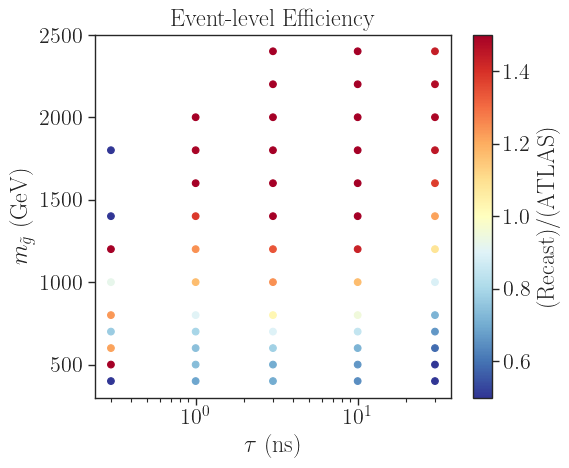

In [17]:
fig = plt.figure(figsize=(6,5))
atlasAcc = []
ratio = []
x = []
y = []
for irow,row in recastDF.iterrows():
    atlasDF_sel = atlasDF[(atlasDF['mLLP'] == row['mLLP']) 
                          & (atlasDF['mLSP'] == row['mLSP'])
                          & (atlasDF['tau_ns'] == row['tau_ns'])
                          ]
    if len(atlasDF_sel) != 1:
        continue
    y.append(row['mLLP'])
    x.append(row['tau_ns'])
    ratio.append(row['$|\eta|<1.8$'][0]/(atlasDF_sel.iloc[0]['Event Efficiency']*atlasDF_sel.iloc[0]['Acceptance']))

plt.xscale('log')
plt.scatter(x,y,c=ratio,cmap=cm,vmin=0.5,vmax=1.5)
plt.ylabel(r'$m_{\tilde g}$ (GeV)')
plt.xlabel(r'$\tau$ (ns)')
plt.colorbar(label=r'(Recast)/(ATLAS)')
plt.title('Event-level Efficiency')
plt.tight_layout()
plt.show()

### Compare Efficiency for SR-Inclusive_High

/tmp/ipykernel_10622/3034762410.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  ratio.append(row['(SR-High - no mass Window)'][0]/(atlasDF_sel.iloc[0]['(SR-High - no mass Window)']*atlasDF_sel.iloc[0]['Acceptance']))


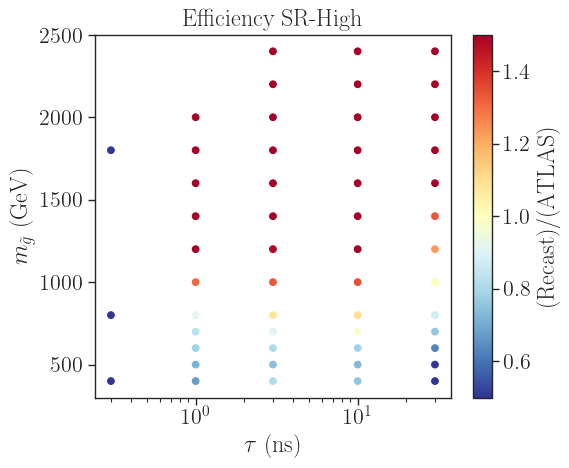

In [18]:
fig = plt.figure(figsize=(6,5))
atlasAcc = []
ratio = []
x = []
y = []
for irow,row in recastDF.iterrows():
    atlasDF_sel = atlasDF[(atlasDF['mLLP'] == row['mLLP']) 
                          & (atlasDF['mLSP'] == row['mLSP'])
                          & (atlasDF['tau_ns'] == row['tau_ns'])
                          ]
    if len(atlasDF_sel) != 1:
        continue
    y.append(row['mLLP'])
    x.append(row['tau_ns'])
    ratio.append(row['(SR-High - no mass Window)'][0]/(atlasDF_sel.iloc[0]['(SR-High - no mass Window)']*atlasDF_sel.iloc[0]['Acceptance']))

plt.xscale('log')
plt.scatter(x,y,c=ratio,cmap=cm,vmin=0.5,vmax=1.5)
plt.ylabel(r'$m_{\tilde g}$ (GeV)')
plt.xlabel(r'$\tau$ (ns)')
plt.colorbar(label=r'(Recast)/(ATLAS)')
plt.title('Efficiency SR-High')
plt.tight_layout()
plt.show()

### Compare Efficiency for SR-Inclusive_Low

/tmp/ipykernel_10622/3632848833.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  ratio.append(row['(SR-Low - no mass Window)'][0]/(atlasDF_sel.iloc[0]['(SR-Low - no mass Window)']*atlasDF_sel.iloc[0]['Acceptance']))


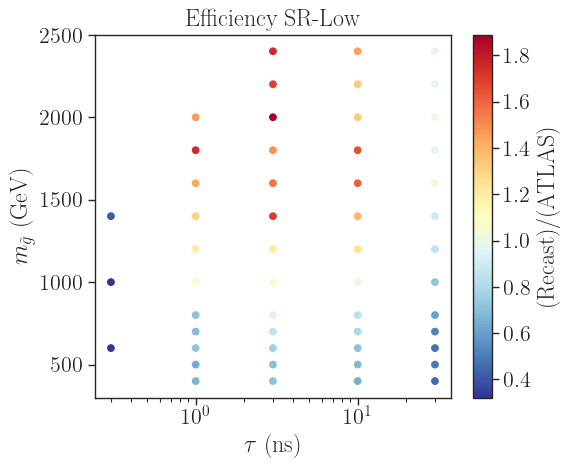

In [19]:
fig = plt.figure(figsize=(6,5))
atlasAcc = []
ratio = []
x = []
y = []
for irow,row in recastDF.iterrows():
    atlasDF_sel = atlasDF[(atlasDF['mLLP'] == row['mLLP']) 
                          & (atlasDF['mLSP'] == row['mLSP'])
                          & (atlasDF['tau_ns'] == row['tau_ns'])
                          ]
    if len(atlasDF_sel) != 1:
        continue
    y.append(row['mLLP'])
    x.append(row['tau_ns'])
    ratio.append(row['(SR-Low - no mass Window)'][0]/(atlasDF_sel.iloc[0]['(SR-Low - no mass Window)']*atlasDF_sel.iloc[0]['Acceptance']))

plt.xscale('log')
plt.scatter(x,y,c=ratio,cmap=cm)
plt.ylabel(r'$m_{\tilde g}$ (GeV)')
plt.xlabel(r'$\tau$ (ns)')
plt.colorbar(label=r'(Recast)/(ATLAS)')
plt.title('Efficiency SR-Low')
plt.tight_layout()
plt.show()

### Simple cross-check for cross-sections

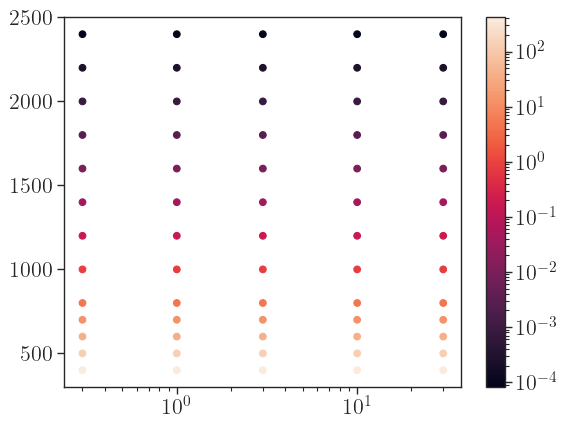

In [20]:
from matplotlib.colors import LogNorm
plt.scatter(recastDF['tau_ns'],recastDF['mLLP'],c=recastDF['Total xsec (pb)'],norm=LogNorm())
plt.xscale('log')
plt.colorbar()
plt.show()

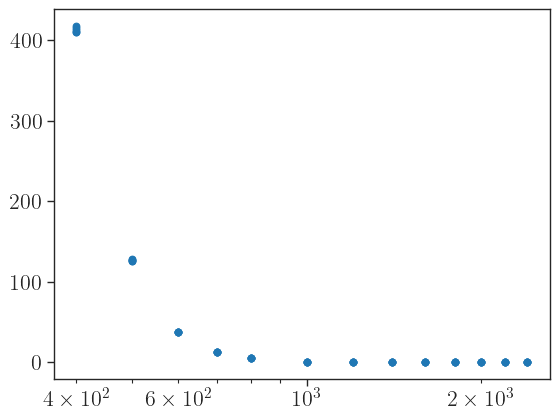

In [21]:
plt.scatter(recastDF['mLLP'],recastDF['Total xsec (pb)'])
plt.xscale('log')
plt.show()